# AIRBNB EDA

Exploring Airbnb data of the city of New York

##  PURPOSE

The purpose of this report is to examine the assumption that location is the primary factor that drives the price of a listings at the Airbnb platform. Once the assumption has been tested, if given a positive correlation we will explore what factors drive the price for listings outside the top locations as to obtain a set of recomendations to clients who would want to maximise their rent.

In [2]:
!pip install numpy


In [3]:
!pip install pandas

## Data Loading

In [30]:
import pandas as pd
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv('data/airbnb_nyc.csv', delimiter=',')

In [3]:
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [5]:
listings.info(verbose=True ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

## DATA VOLUME AND TYPE

In [5]:
# 30179 rows × 81 columns
listings.shape

(30179, 81)

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

#We can se from the data that columns 1 to 7 provide the general information of the listing and that from 54 onwards are bolean for having a specific amenity. 

## CLEANING DE DATA


In [7]:
listings.isnull().values.any()

True

In [8]:
listings.isna()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30175,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30176,False,False,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30177,False,False,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Columns with NA values:
listings.columns[listings.isnull().any()]

Index(['name', 'summary', 'description', 'neighborhood_overview', 'transit',
       'house_rules', 'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'neighbourhood', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [10]:
#How many NA values:
listings.values.any()

2539

In [35]:
##We will drop most of those columns since they are of no interest to our purpose and we will keep:

In [43]:
#Selecting only values that we will need:
temp_listings=listings.loc[:, ['id','experiences_offered',
       'host_is_superhost', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'extra_people',
       'number_of_reviews', 
       'review_scores_rating', 
       'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'] ]
temp_listings

,id,experiences_offered,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,none,0.0,Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,none,0.0,Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,none,0.0,Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,none,1.0,Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,none,0.0,Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,none,0.0,Jamaica,40.69137,-73.80844,House,Private room,6,2.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,none,0.0,Bedford-Stuyvesant,40.67853,-73.94995,Townhouse,Private room,3,1.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,none,0.0,Brooklyn,40.70184,-73.93317,Apartment,Private room,1,1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,none,0.0,Hell's Kitchen,40.75751,-73.99112,Apartment,Shared room,1,1.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [47]:
#We will drop the rows that do not have a neighbourhood, review score or marked if super host for the purspose of this exercise
clean_listings=temp_listings.dropna(subset = ['neighbourhood', 'host_is_superhost', 'review_scores_rating'])
clean_listings.columns[clean_listings.isnull().any()]

Index([], dtype='object')

In [56]:
#To explore price we feel we should look at price per person as an obvious correlation is present with a large property
price_per_person =clean_listings ['price'] / clean_listings ['accommodates']
average_price_per_person=price_per_person.mean()
print (average_price_per_person)

50.8518589873633


In [54]:
#Let´s add price per person on to our list:
clean_listings['price_per_p']=price_per_person

<ipython-input-54-36479a51e90e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_listings['price_per_p']=price_per_person


In [48]:
clean_listings.corr()

,id,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.072576,-0.012020,0.121261,0.087331,0.023798,0.034553,0.068904,0.010757,0.067654,...,-0.035661,-0.004036,0.103990,-0.098727,0.255430,-0.047746,0.161562,-0.003023,-0.064460,0.013524
host_is_superhost,0.072576,1.000000,-0.016251,0.069414,0.017189,-0.001790,0.019541,0.015160,-0.010095,0.024839,...,-0.011224,0.025748,0.131320,-0.011294,0.092832,0.051937,0.112930,-0.026266,0.040799,-0.005958
latitude,-0.012020,-0.016251,1.000000,0.094086,-0.031920,-0.076036,-0.070018,-0.046133,0.062962,-0.042473,...,0.035033,-0.012711,-0.003558,-0.015412,-0.089887,-0.002956,-0.080758,-0.011266,0.030229,-0.023618
longitude,0.121261,0.069414,0.094086,1.000000,-0.038705,0.025546,-0.011519,-0.000588,-0.295011,0.014664,...,-0.019960,-0.022891,0.027436,-0.015180,0.114865,0.011466,0.039404,0.049524,0.044883,0.026345
accommodates,0.087331,0.017189,-0.031920,-0.038705,1.000000,0.260567,0.722425,0.752339,0.593201,0.549734,...,0.004009,0.028551,0.097926,0.058362,0.220562,0.027309,0.143120,-0.055050,0.044625,0.047148
bathrooms,0.023798,-0.001790,-0.076036,0.025546,0.260567,1.000000,0.337230,0.299486,0.174153,0.166434,...,0.016502,0.021695,0.025113,0.005188,0.040560,0.073150,0.081149,-0.002914,0.008741,0.033509
bedrooms,0.034553,0.019541,-0.070018,-0.011519,0.722425,0.337230,1.000000,0.700957,0.490323,0.470491,...,-0.001014,0.018396,0.063780,0.030898,0.173681,0.021180,0.077779,-0.043639,0.016369,0.024881
beds,0.068904,0.015160,-0.046133,-0.000588,0.752339,0.299486,0.700957,1.000000,0.437197,0.482782,...,0.001634,0.019237,0.094192,0.013051,0.173506,0.033545,0.117027,-0.051336,0.034992,0.032368
price,0.010757,-0.010095,0.062962,-0.295011,0.593201,0.174153,0.490323,0.437197,1.000000,0.377068,...,0.033511,0.026378,0.068517,0.026277,0.111960,0.019347,0.091308,-0.071167,0.040211,-0.001970
guests_included,0.067654,0.024839,-0.042473,0.014664,0.549734,0.166434,0.470491,0.482782,0.377068,1.000000,...,-0.022519,0.022252,0.096150,0.020256,0.163774,0.015166,0.125280,-0.041291,0.051334,0.008685


In [58]:
corrm= clean_listings.corr()
corrm['price_per_person']
pos_cor=corrm['price_per_person'] >0
corrm['price_per_person'] [pos_cor].sort_values(ascending =False)

price_per_p              1.000000
price_per_person         1.000000
price                    0.520698
elevator                 0.161481
gym                      0.129057
white_goods              0.101211
latitude                 0.099904
tv                       0.090176
air_conditioning         0.084684
review_scores_rating     0.079645
extra_people             0.059440
hot_tub_sauna_or_pool    0.042270
check_in_24h             0.030736
balcony                  0.015919
accessible               0.011752
bbq                      0.010491
breakfast                0.009888
nature_and_views         0.009344
Name: price_per_person, dtype: float64

In [63]:
clean_listings.groupby('neighbourhood').count()

,id,experiences_offered,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Allerton,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Alphabet City,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
Annadale,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Astoria,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,323,323,323,323
Battery Park City,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williamsburg,884,884,884,884,884,884,884,884,884,884,...,884,884,884,884,884,884,884,884,884,884
Windsor Terrace,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Woodhaven,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [95]:
#Let´s look at price per person and  neighbourhood relationship 
price_per_person_and_neighbourhood=clean_listings.groupby('neighbourhood').agg({'id':['count'], 'price_per_person' : ['mean']})
pd.set_option('display.max_rows', 176 )
price_per_person_and_neighbourhood

,id,price_per_person
,count,mean
neighbourhood,,
Allerton,3,18.333333
Alphabet City,123,60.048026
Annadale,2,24.966667
Astoria,323,46.521045
Battery Park City,6,61.041667
Bay Ridge,50,39.328810
Baychester,5,32.850000
Bayside,8,49.750000


In [96]:
neighbourhood_by_group=clean_listings.groupby('neighbourhood').count()
neighbourhood_by_group.nlargest(10, 'price')

,id,experiences_offered,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Brooklyn,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,...,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008
Manhattan,4189,4189,4189,4189,4189,4189,4189,4189,4189,4189,...,4189,4189,4189,4189,4189,4189,4189,4189,4189,4189
Queens,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,...,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167
Williamsburg,884,884,884,884,884,884,884,884,884,884,...,884,884,884,884,884,884,884,884,884,884
Bedford-Stuyvesant,851,851,851,851,851,851,851,851,851,851,...,851,851,851,851,851,851,851,851,851,851
Harlem,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716
Midtown,523,523,523,523,523,523,523,523,523,523,...,523,523,523,523,523,523,523,523,523,523
Bushwick,481,481,481,481,481,481,481,481,481,481,...,481,481,481,481,481,481,481,481,481,481
Upper West Side,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368


In [97]:
neighbourhood_by_group.nsmallest(10, 'price')

,id,experiences_offered,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Bergen Beach,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Dongan Hills,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Dyker Heights,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Eastchester,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fort Hamilton,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Graniteville,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Grant City,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Hillcrest,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Howard Beach,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [98]:
#we can see that there are plenty of single listings or with very little on the bottom list
# which we can remove to have  a clear sense 
less_than_200=neighbourhood_by_group[ (neighbourhood_by_group['room_type'] <= 200) ].index
neighbourhood_by_group.drop(less_than_200, inplace = True)
neighbourhood_by_group

,id,experiences_offered,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Astoria,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,323,323,323,323
Bedford-Stuyvesant,851,851,851,851,851,851,851,851,851,851,...,851,851,851,851,851,851,851,851,851,851
Brooklyn,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008,...,5008,5008,5008,5008,5008,5008,5008,5008,5008,5008
Bushwick,481,481,481,481,481,481,481,481,481,481,...,481,481,481,481,481,481,481,481,481,481
Chelsea,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
Crown Heights,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
East Village,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Flatbush,260,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
Harlem,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716


In [100]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (20,10) )
sns.histplot(y='neighbourhood', x='price_per_person', data='neighbourhood_by_group')
plt.show()

ValueError: Could not interpret value `price_per_person` for parameter `x`

<Figure size 1440x720 with 0 Axes>

In [34]:
#Let´s visualize it
import folium
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[40.64749,-73.97237], 
                         zoom_start=10, 
                         tiles="OpenStreetMap")
temp = clean_listings[['latitude','longitude','price_per_person']]
temp = temp.dropna()

price_by_location = zip(temp['latitude'], temp['longitude'],temp['price_per_person'])
list_of_price_by_location = list(price_by_location)
list_of_price_by_location[0:15]

[(40.64749, -73.97237, 74.5),
 (40.80902, -73.9419, 75.0),
 (40.79685, -73.94872, 47.5),
 (40.65599, -73.97519, 30.0),
 (40.86754, -73.92639, 40.0),
 (40.63702, -73.96327, 150.0),
 (40.66278, -73.97966, 60.0),
 (40.65944, -73.96238, 75.0),
 (40.68554, -73.9409, 23.0),
 (40.73961, -73.98074, 100.0),
 (40.72004, -73.99104, 110.0),
 (40.6734299999999, -73.98338, 56.25),
 (40.65401, -73.96323, 32.5),
 (40.72912, -73.98057, 25.0),
 (40.68634, -73.966, 32.666666666666664)]

In [35]:
folium_hmap.add_child(HeatMap(list_of_price_by_location,
                              min_opacity=0.2,
                              radius = 8,
                              blur = 6))

In [10]:
!pip install geopandas
import geopandas as gpd
import contextily as cx
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using cached Fiona-1.8.3.tar.gz (1.1 MB)
  Usi

    ERROR: Command errored out with exit status 1:
     command: 'D:\Anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SOS\\AppData\\Local\\Temp\\pip-install-cw7niley\\fiona_99824ddb244844f782ba85ca9f1ee175\\setup.py'"'"'; __file__='"'"'C:\\Users\\SOS\\AppData\\Local\\Temp\\pip-install-cw7niley\\fiona_99824ddb244844f782ba85ca9f1ee175\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\SOS\AppData\Local\Temp\pip-pip-egg-info-c23l6_hl'
         cwd: C:\Users\SOS\AppData\Local\Temp\pip-install-cw7niley\fiona_99824ddb244844f782ba85ca9f1ee175\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Command errored ou

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
df.crs
df_wm = df.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [101]:
#We can see that of course central locations have higher prices:
neighbourhood_by_group.sort_values(by='price_per_person')

,id,experiences_offered,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Hell's Kitchen,207,207,207,207,207,207,207,207,207,207,...,207,207,207,207,207,207,207,207,207,207
Chelsea,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
Washington Heights,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
The Bronx,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227
Flatbush,260,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
Lower East Side,263,263,263,263,263,263,263,263,263,263,...,263,263,263,263,263,263,263,263,263,263
East Village,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
Crown Heights,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
Astoria,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,323,323,323,323


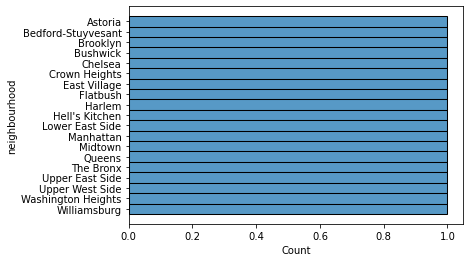

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
bins_list=200,500,1000,1500
%matplotlib inline
sns.histplot(y='neighbourhood', stat='count', data=neighbourhood_by_group, bins=bins_list)
plt.show()
#i don´t understand why my count still shows 0 to 1???? 

<AxesSubplot:xlabel='neighbourhood'>

<Figure size 1440x1440 with 0 Axes>

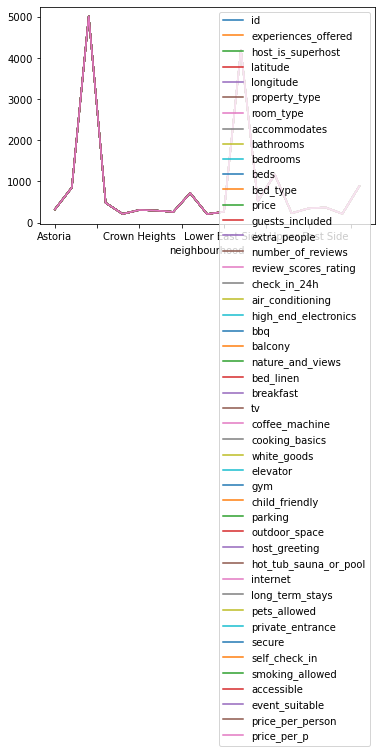

In [104]:
#Let´s see it
plt.figure(figsize=(20, 20))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
neighbourhood_by_group.plot()

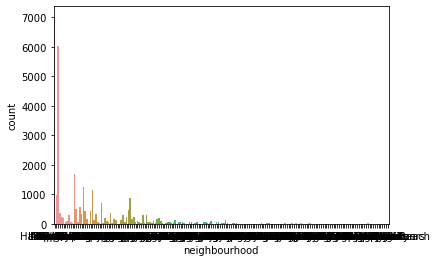

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data=factors, x='neighbourhood')
plt.show()

In [105]:
#Let´s explore the room type
room_type_by_group=clean_listings.groupby('room_type').count()
room_type_by_group

,id,experiences_offered,host_is_superhost,neighbourhood,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,10207,10207,10207,10207,10207,10207,10207,10207,10207,10207,...,10207,10207,10207,10207,10207,10207,10207,10207,10207,10207
Private room,10336,10336,10336,10336,10336,10336,10336,10336,10336,10336,...,10336,10336,10336,10336,10336,10336,10336,10336,10336,10336
Shared room,540,540,540,540,540,540,540,540,540,540,...,540,540,540,540,540,540,540,540,540,540


In [ ]:
#We can straight away see that a private room/entire home are by far most popular as expected


In [175]:
#Let´s look at price
bins = [20, 40, 60, 80, 100,200,500,1000]
price_by_group= factors.groupby(['price', pd.cut(factors.price, bins)])
price_by_group.size().unstack()


#i'm stuck ..... this should work in principle for grouping by bins but something is wrong...HELP

price,"(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 200]","(200, 500]","(500, 1000]"
price,,,,,,,
0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
496,0,0,0,0,0,1,0
497,0,0,0,0,0,1,0
498,0,0,0,0,0,1,0


In [106]:
#let´s look at the importance of internet

internet_yes=clean_listings.groupby('internet').count()
internet_yes

,id,experiences_offered,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,price_per_person,price_per_p
internet,,,,,,,,,,,,,,,,,,,,,
-1,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365
1,20718,20718,20718,20718,20718,20718,20718,20718,20718,20718,...,20718,20718,20718,20718,20718,20718,20718,20718,20718,20718


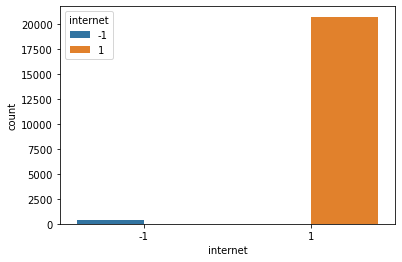

In [107]:
#We can easily see that having internet is almost a must
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data=clean_listings, x='internet', hue='internet')
plt.show()

In [112]:
final_list=clean_listings.drop[ ('Chelsea', 'Washington Heights', 'East Village', 'Crown Heights', 'Astoria','Bushwick',
  'Harlem', 'Queens', 'Manhattan','Brooklyn')]

TypeError: 'method' object is not subscriptable

In [125]:
#My next step would be to drop the rows of the top neighbourhoods and concentrate on the amenities of the other neighbourhoods
#by looking at the correlation between price and each other factor
indexNames = clean_listings[ (clean_listings['neighbourhood'] == 'Chelsea') 
                            & (clean_listings['neighbourhood'] == 'Washington Heights')
                            & (clean_listings['neighbourhood'] == 'East Village')
                            & (clean_listings['neighbourhood'] == 'Crown Heights') 
                            & (clean_listings['neighbourhood'] == 'Harlem') 
                            & (clean_listings['neighbourhood'] == 'Queens') 
                            & (clean_listings['neighbourhood'] == 'Manhattan') 
                            & (clean_listings['neighbourhood'] == 'Brooklyn') ].index
final_list= clean_listings.drop(indexNames , inplace=True)



In [124]:
final_list.corr()

AttributeError: 'NoneType' object has no attribute 'corr'

In [122]:
corrm= final_list.corr()
corrm['price_per_person']
pos_cor=corrm['price_per_person'] >0
corrm['price_per_person'] [pos_cor].sort_values(ascending =False)

AttributeError: 'NoneType' object has no attribute 'corr'

In [123]:
##RECOMENDATIONS

In [ ]:
#Apartments that are in not top locations should invest in having the following :

